In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_edges': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 '_errors': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[1.167 ± 0.773   1.533 ± 0.464   1.587 ± 0.208   1.569 ± 0.159
 1.500 ± 0.119   1.402 ± 0.112   1.518 ± 0.150   1.645 ± 0.231
 1.179 ± 0.321   1.911 ± 1.476]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[2.000 ± 1.414   1.000 ± 1.000   1.000 ± 1.000   3.000 ± 1.732
 8.000 ± 2.828   12.000 ± 3.464   25.000 ± 5.000   25.000 ± 5.000
 41.000 ± 6.403   39.000 ± 6.245   61.000 ± 7.810   52.000 ± 7.211
 73.000 ± 8.544   71.000 ± 8.426   94.000 ± 9.695   76.000 ± 8.718
 78.000 ± 8.832   74.000 ± 8.602   58.000 ± 7.616   52.000 ± 7.211
 47.000 ± 6.856   29.000 ± 5.385   27.000 ± 5.196   23.000 ± 4.796
 9.000 ± 3.000   5.000 ± 2.236   6.000 ± 2.449   5.000 ± 2.236
 2.000 ± 1.414   1.000 ± 1.000]

Or, just explicitly plot it with matplotlib.

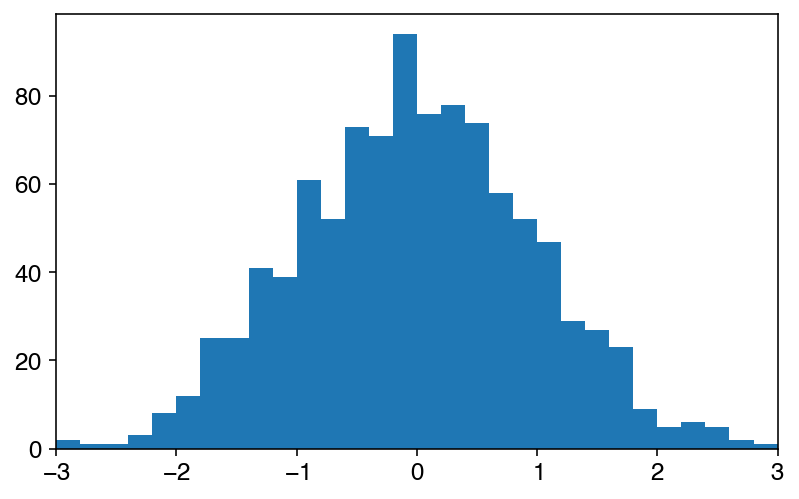

In [6]:
num.plot()

Change the style and show bin counts with some more options.

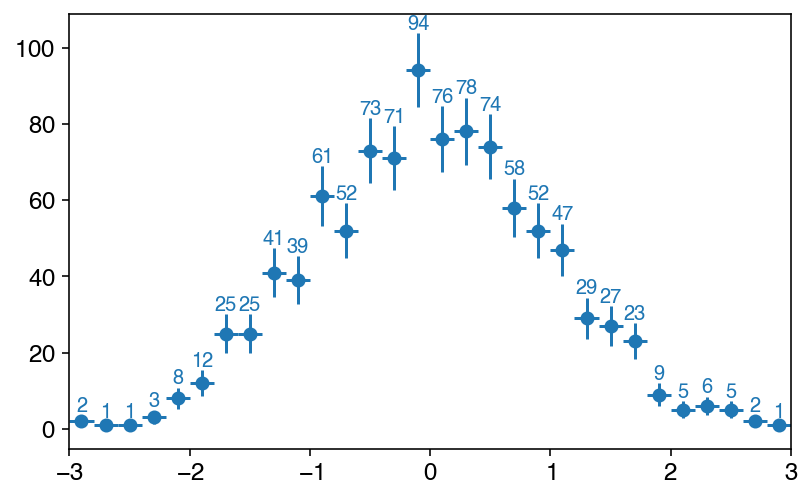

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[2.333 ± 1.546   3.066 ± 0.928   3.175 ± 0.417   3.139 ± 0.317
 3.001 ± 0.239   2.803 ± 0.225   3.036 ± 0.299   3.289 ± 0.461
 2.357 ± 0.642   3.821 ± 2.953]

Make a more complicated plot with a ratio panel.

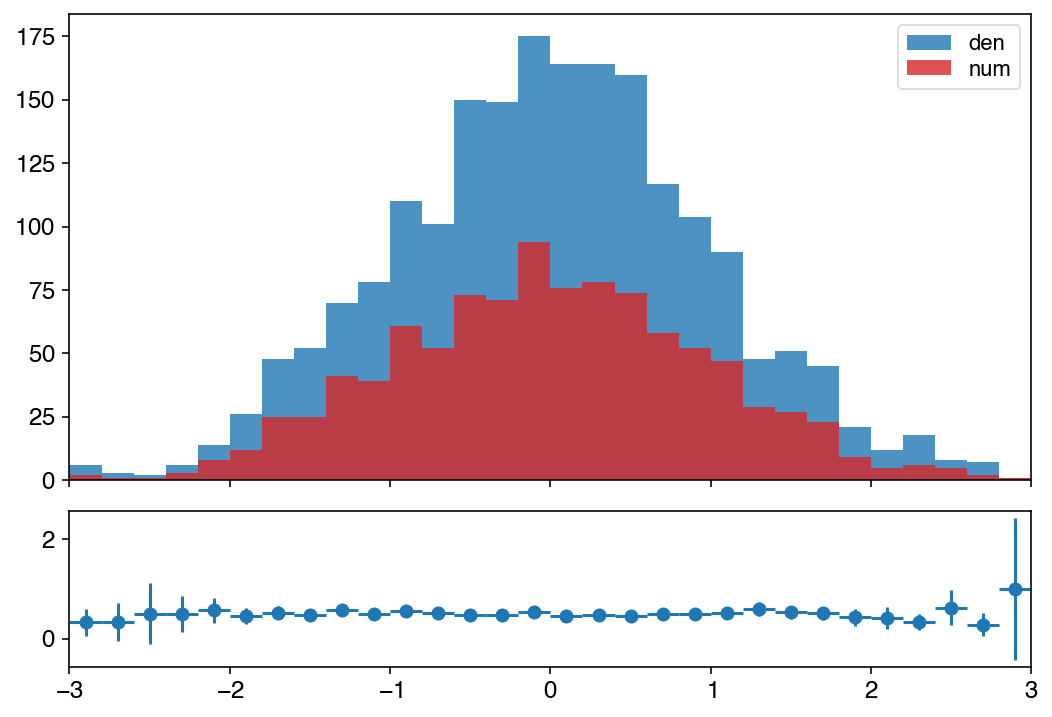

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True)
ax1.legend()

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [2.0, 1.0, 1.0, 3.0, 8.0, 12.0, 25.0, 25.0, 41.0, 39.0, 61.0, 52.0, 73.0, 71.0, 94.0, 76.0, 78.0, 74.0, 58.0, 52.0, 47.0, 29.0, 27.0, 23.0, 9.0, 5.0, 6.0, 5.0, 2.0, 1.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.4142135623730951, 1.0, 1.0, 1.7320508075688772, 2.8284271247461903, 3.4641016151377544, 5.0, 5.0, 6.4031242374328485, 6.244997998398398, 7.810249675906654, 7.211102550927978, 8.54400374531753, 8.426149773176359, 9.695359714832659, 8.717797887081348, 8.831760866327848, 8.602325267042627, 7.615773105863909, 7.211102550927978, 6.855654600401044, 5.385164807134504

In [11]:
Hist1D.from_json(num.to_json())

[2.000 ± 1.414   1.000 ± 1.000   1.000 ± 1.000   3.000 ± 1.732
 8.000 ± 2.828   12.000 ± 3.464   25.000 ± 5.000   25.000 ± 5.000
 41.000 ± 6.403   39.000 ± 6.245   61.000 ± 7.810   52.000 ± 7.211
 73.000 ± 8.544   71.000 ± 8.426   94.000 ± 9.695   76.000 ± 8.718
 78.000 ± 8.832   74.000 ± 8.602   58.000 ± 7.616   52.000 ± 7.211
 47.000 ± 6.856   29.000 ± 5.385   27.000 ± 5.196   23.000 ± 4.796
 9.000 ± 3.000   5.000 ± 2.236   6.000 ± 2.449   5.000 ± 2.236
 2.000 ± 1.414   1.000 ± 1.000]

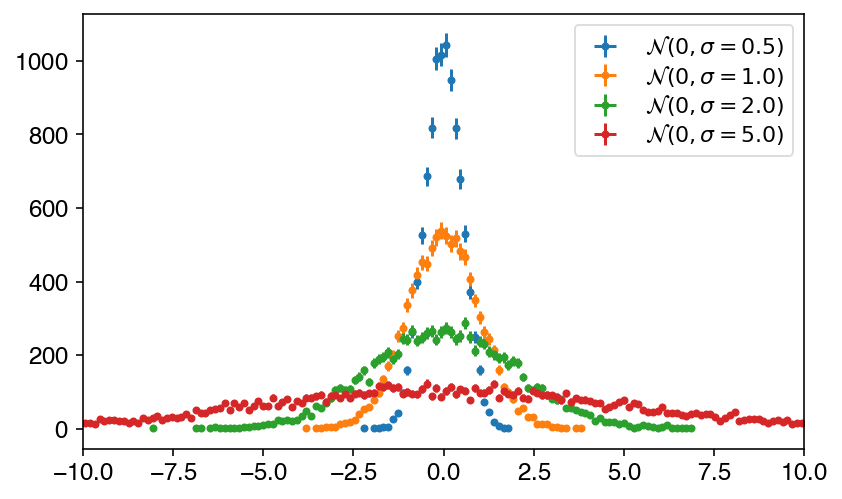

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0).legend() for sigma in [0.5,1,2,5]
];

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [13]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   1.000 ± 1.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]


Similar to the 1D object, the HTML representation for 2D histograms has a simplified plot but without explicit bin counts. Instead, if the number of bins is not too large, you can hover over the output and see values at the bottom. To keep it simple, only SVG and CSS code is used--no JS.

In [14]:
h

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   1.000 ± 1.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]

Or just plot it with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x11b604630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b1c8198>)

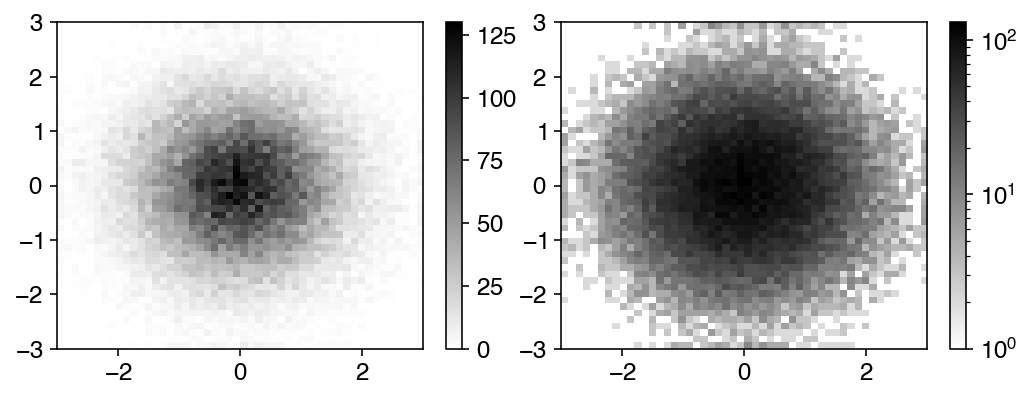

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="binary")
h.plot(ax=ax2, cmap="binary", logz=True)

Chain a few methods together. `x_projection` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

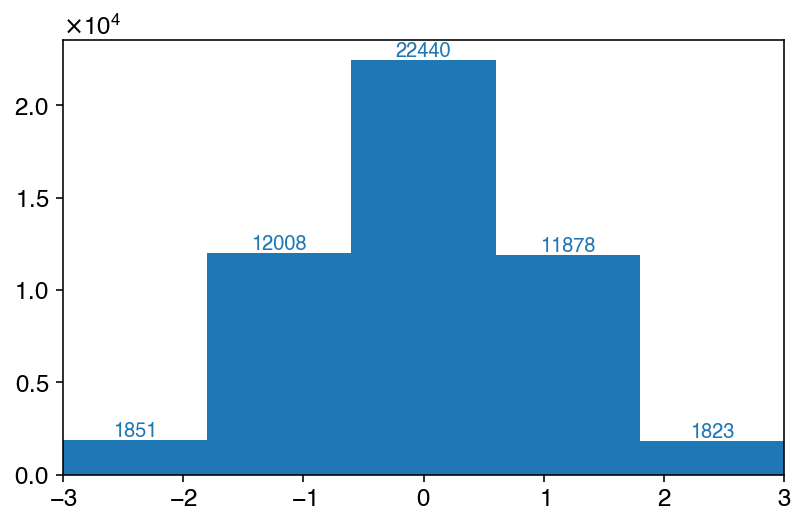

In [16]:
h.rebin(10).x_projection().plot(show_counts=True)

`x_profile` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

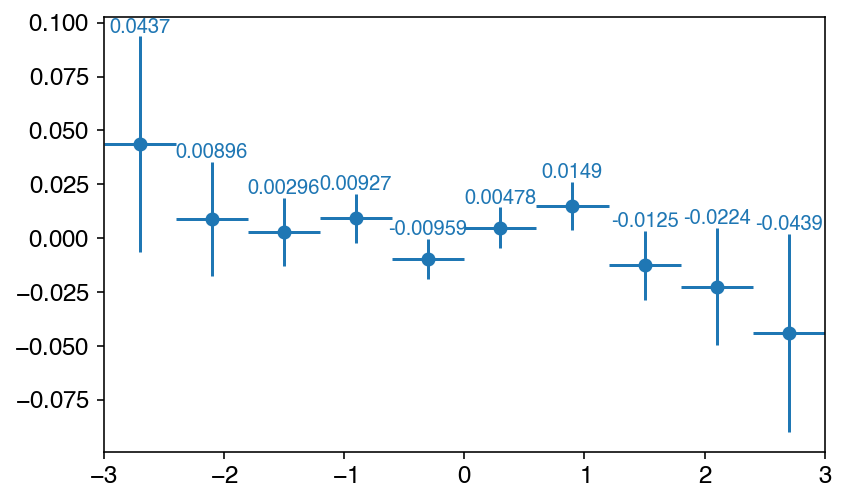

In [17]:
h.rebin(5).x_profile().plot(show_counts=True,show_errors=True, counts_fmt_func="{:.3g}".format)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors.

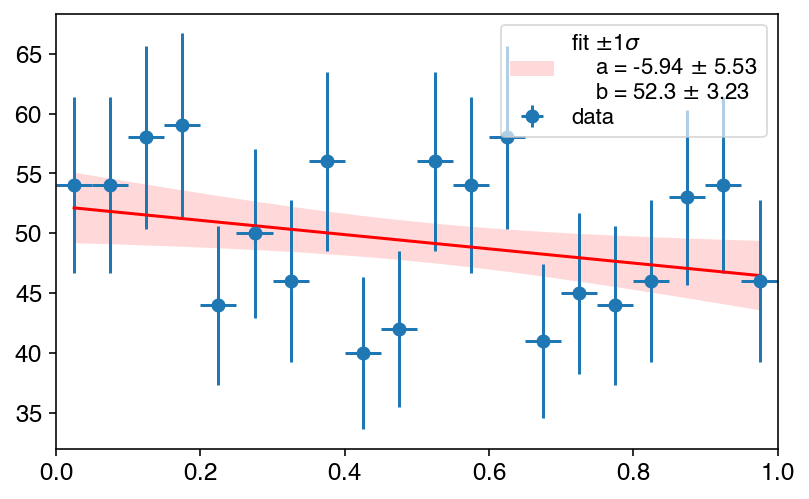

In [18]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

plt.gca().legend()

Or a slightly more complicated fit, with a ratio panel...

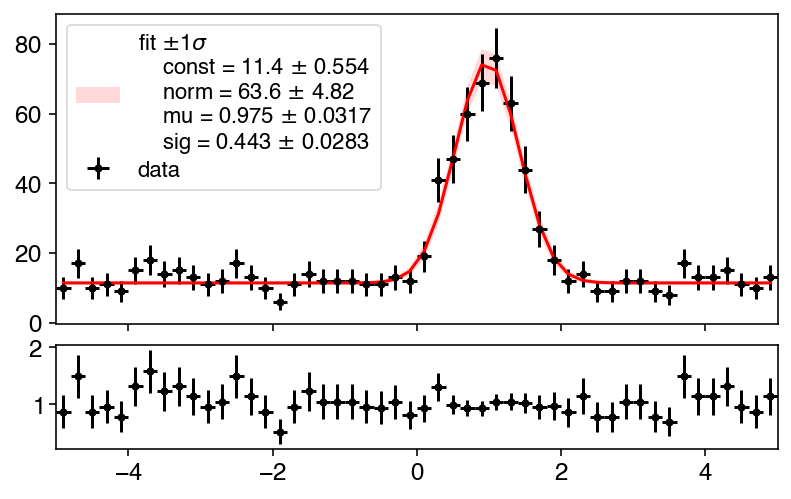

In [19]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

res = hdata.fit("const+norm*np.exp(-(x-mu)**2/(2*sig**2))", ax=ax1)

ratio = (hdata/res["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

ax1.legend()